<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/DL_Day_4_HOML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning

In [1]:
# lets create the base model first

In [2]:
import tensorflow as tf
from tensorflow import keras


print(tf.__version__)

2.15.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0 # dividing by 255.0 to scale the image values to 0-1
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer="sgd", # optimizer=keras.optimiz ers.SGD(lr=<learning rate value>) default learning rate = 0.01
    metrics = ['accuracy']
)

In [8]:
history = model.fit(X_train,y_train, epochs = 30, validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7156 - accuracy: 0.7643 - val_loss: 0.5142 - val_accuracy: 0.8248
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4896 - accuracy: 0.8297 - val_loss: 0.4528 - val_accuracy: 0.8478
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4458 - accuracy: 0.8440 - val_loss: 0.4370 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4167 - accuracy: 0.8545 - val_loss: 0.3963 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3963 - accuracy: 0.8595 - val_loss: 0.3838 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3785 - accuracy: 0.8665 - val_loss: 0.3833 - val_accuracy: 0.8648
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3651 - accuracy: 0.8711 - val_loss: 0.3675 - val_accura

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


history_pd = pd.DataFrame(history.history)
history_pd

,loss,accuracy,val_loss,val_accuracy
0,0.715648,0.764345,0.514175,0.8248
1,0.489562,0.829709,0.452777,0.8478
2,0.445776,0.844000,0.437034,0.8524
3,0.416708,0.854509,0.396271,0.8606
4,0.396318,0.859455,0.383850,0.8678
5,0.378490,0.866509,0.383283,0.8648
6,0.365112,0.871127,0.367463,0.8718
7,0.353864,0.874273,0.355148,0.8766
8,0.343202,0.877927,0.367925,0.8700
9,0.334318,0.880255,0.340978,0.8766


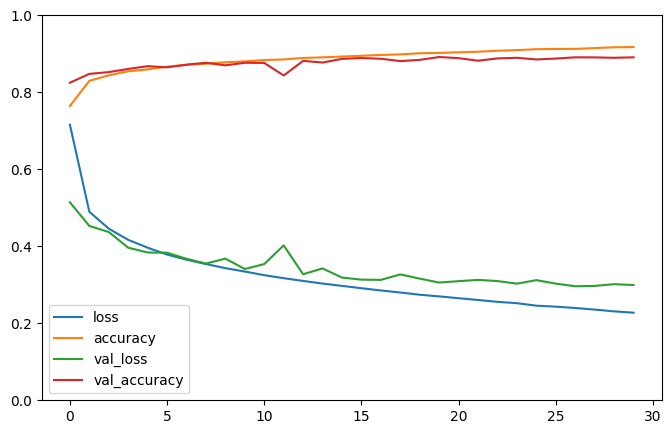

In [10]:
history_pd.plot(kind='line', figsize=(8, 5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 62.6919 - accuracy: 0.8506


[62.691932678222656, 0.850600004196167]

In [12]:
model.save("mnist_fashion_base_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
!ls -ltr

total 2116
drwxr-xr-x 1 root root    4096 Feb 22 14:24 sample_data
-rw-r--r-- 1 root root 2158696 Feb 26 02:10 mnist_fashion_base_model.h5


## Now start transfer learning

In [14]:
model_base = keras.models.load_model("mnist_fashion_base_model.h5")
new_model = keras.models.Sequential(model_base.layers[:-1])

new_model.add(keras.layers.Dense(1,activation="sigmoid"))

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 265701 (1.01 MB)
Trainable params: 265701 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# above declaration will update model A because we have just copied by reference.
# for deep copy lets clone the base model

model_base_clone = keras.models.clone_model(model_base)
model_base_clone.set_weights(model_base.get_weights())

In [17]:
new_model = keras.models.Sequential(model_base_clone.layers[:-1])

new_model.add(keras.layers.Dense(1,activation="sigmoid"))

new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 265701 (1.01 MB)
Trainable params: 265701 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# freeze pre trained layers
for layer in new_model.layers[:-1]:
  layer.trainable = False

In [19]:
new_model.compile(loss = "binary_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [20]:
# We must always compile your model after you freeze or unfreeze layers

In [23]:
# data_prep
import numpy as np
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [24]:
# now we can train the new model for few epochs and unfreeze few layers and then continue training

history = new_model.fit(X_train_B, y_train_B, epochs = 4, validation_data = (X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 2s 70ms/step - loss: 0.4247 - accuracy: 0.8800 - val_loss: 0.3454 - val_accuracy: 0.9442
Epoch 2/4
7/7 [==============================] - 0s 16ms/step - loss: 0.2951 - accuracy: 0.9600 - val_loss: 0.2607 - val_accuracy: 0.9807
Epoch 3/4
7/7 [==============================] - 0s 31ms/step - loss: 0.2265 - accuracy: 0.9800 - val_loss: 0.2116 - val_accuracy: 0.9868
Epoch 4/4
7/7 [==============================] - 0s 17ms/step - loss: 0.1850 - accuracy: 0.9950 - val_loss: 0.1775 - val_accuracy: 0.9929


In [25]:
# Unfreeze layers
for layers in new_model.layers[:-1]:
  layer.trainable = True

In [26]:
# compile model and change the learning rate

optimizer = keras.optimizers.SGD(learning_rate = 0.00001) # reduced learning rate
new_model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])


In [27]:
history = new_model.fit(X_train_B, y_train_B, epochs = 16, validation_data = (X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 1s 45ms/step - loss: 0.1519 - accuracy: 0.9950 - val_loss: 0.1447 - val_accuracy: 0.9939
Epoch 2/16
7/7 [==============================] - 0s 16ms/step - loss: 0.1240 - accuracy: 0.9950 - val_loss: 0.1224 - val_accuracy: 0.9990
Epoch 3/16
7/7 [==============================] - 0s 31ms/step - loss: 0.1050 - accuracy: 0.9950 - val_loss: 0.1072 - val_accuracy: 0.9990
Epoch 4/16
7/7 [==============================] - 0s 17ms/step - loss: 0.0918 - accuracy: 0.9950 - val_loss: 0.0955 - val_accuracy: 0.9990
Epoch 5/16
7/7 [==============================] - 0s 17ms/step - loss: 0.0815 - accuracy: 0.9950 - val_loss: 0.0862 - val_accuracy: 0.9990
Epoch 6/16
7/7 [==============================] - 0s 18ms/step - loss: 0.0728 - accuracy: 0.9950 - val_loss: 0.0789 - val_accuracy: 0.9990
Epoch 7/16
7/7 [==============================] - 0s 31ms/step - loss: 0.0664 - accuracy: 0.9950 - val_loss: 0.0731 - val_accuracy: 0.9990
Epoch 8/16
7/7 [===========

In [29]:
new_model.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 4.1825e-04 - accuracy: 0.9995


[0.0004182462580502033, 0.9994999766349792]

In [30]:
# this significantly reduces the error

# Unsupervised Pretraining

In [32]:
# say auto encoders or GAN (generative adversarial network)

#### Pretraining on an Auxiliary Task

# Faster Optimizers

## momentum Optimizer

In [33]:
momentum_optimizer = keras.optimizers.SGD(momentum = 0.9, learning_rate = 0.00001)

## Nesterov Accelerated Gradient

In [36]:
nag_optimizer = keras.optimizers.SGD(learning_rate = 0.00001, momentum = 0.9, nesterov = True)

## Ada Grad

In [ ]:
# scaling down the gradient vector along the steepest dimensions



## RMSProp

In [37]:
rms_prop_optimizer = keras.optimizers.RMSprop(learning_rate = 0.00001, rho = 0.9)

## Adam

In [38]:
# momentum + RMSProp

In [39]:
adam_optimizer = keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999)

# Larning Rate scheduling

In [41]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = keras.optimizers.SGD(lr_schedule)